In [1]:
import warnings
warnings.filterwarnings( 'ignore' )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer

In [ ]:
dir = '../../../data/top30groups/'

sample_size = 100
df = pd.read_csv(f'{dir}df_top30_{sample_size}.csv')

train_frames = []
test_frames = []

for _, group_data in df.groupby('gname'):
    split_point = int(len(group_data) * 0.7)
    train_frames.append(group_data.iloc[:split_point])
    test_frames.append(group_data.iloc[split_point:])

traindata = pd.concat(train_frames)
testdata = pd.concat(test_frames)


traindata = traindata.drop(columns=['Unnamed: 0','iyear', 'imonth', 'iday', 'attack_date'])
testdata = testdata.drop(columns=['Unnamed: 0','iyear', 'imonth', 'iday', 'attack_date'])


print(traindata.shape)
print(testdata.shape)

(2100, 23)
(900, 23)


In [3]:
len(traindata['gname'].value_counts())

30

In [4]:
def split_data(dftrain, dftest):
    Ytrain = dftrain['gname']
    Xtrain = dftrain.drop(columns=['gname'])
    Ytest = dftest['gname']
    Xtest = dftest.drop(columns=['gname'])
    return Xtrain, Ytrain, Xtest, Ytest

def find_best_rfc(Xtrain, Ytrain):

     params = {
          'criterion': ["gini", "entropy"],
          'n_estimators': [5, 10, 20, 50, 100, 150, 200, 300, 500],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          'max_features': ['sqrt', 'log2']
          }

     rfc = RandomForestClassifier(random_state=42)

     tscv = TimeSeriesSplit(n_splits=5)


     #grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv = tscv)
     
     grid_search = RandomizedSearchCV(
            estimator=rfc,
            param_distributions=params,
            scoring='f1_weighted',
            refit=True,
            n_iter=10,
            return_train_score=True,
            cv=tscv,
            n_jobs=-1,
            verbose=1
        )
        

     grid_search.fit(Xtrain, Ytrain)
     best_rfc = grid_search.best_estimator_
     best_rfc_params = grid_search.best_params_
     #print(best_dt)
     return best_rfc_params

In [5]:
best_rfc_params = []
Xtrains = []
Ytrains = []
truths = []
Xtests = []

Xtrain, Ytrain, Xtest, Ytest = split_data(traindata, testdata)
print(f'Finding best rfc for parition')
best_rfc_param = find_best_rfc(Xtrain, Ytrain)
print('---------------------------------')
best_rfc_params.append(best_rfc_param)
Xtrains.append(Xtrain)
Ytrains.append(Ytrain)
truths.append(Ytest)
Xtests.append(Xtest)

Finding best rfc for parition
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------------------------


In [6]:
accuracies = []

print(f'partition 1')
model = RandomForestClassifier(**best_rfc_param, random_state=42)
model.fit(Xtrain, Ytrain)
y_pred_rfc = model.predict(Xtest)
accuracy_rfc = accuracy_score(Ytest, y_pred_rfc)
accuracies.append(accuracy_rfc)
print(f"Accuracy: {accuracy_rfc * 100:.2f}%")
print('-------------------------------------------------')

partition 1
Accuracy: 94.33%
-------------------------------------------------


In [7]:
Ytest.value_counts()

gname
Abu Sayyaf Group (ASG)                              30
African National Congress (South Africa)            30
Tehrik-i-Taliban Pakistan (TTP)                     30
Taliban                                             30
Sikh Extremists                                     30
Shining Path (SL)                                   30
Revolutionary Armed Forces of Colombia (FARC)       30
Palestinians                                        30
Nicaraguan Democratic Force (FDN)                   30
New People's Army (NPA)                             30
National Liberation Army of Colombia (ELN)          30
Muslim extremists                                   30
Maoists                                             30
Manuel Rodriguez Patriotic Front (FPMR)             30
Liberation Tigers of Tamil Eelam (LTTE)             30
Kurdistan Workers' Party (PKK)                      30
Islamic State of Iraq and the Levant (ISIL)         30
Irish Republican Army (IRA)                         30
Hout

In [8]:
print("Unique labels in Ytest:", sorted(set(Ytest)))
print("Unique labels in y_pred_rfc:", sorted(set(y_pred_rfc)))


Unique labels in Ytest: ['Abu Sayyaf Group (ASG)', 'African National Congress (South Africa)', 'Al-Qaida in Iraq', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Al-Shabaab', 'Basque Fatherland and Freedom (ETA)', 'Boko Haram', 'Communist Party of India - Maoist (CPI-Maoist)', 'Corsican National Liberation Front (FLNC)', "Donetsk People's Republic", 'Farabundo Marti National Liberation Front (FMLN)', 'Fulani extremists', 'Houthi extremists (Ansar Allah)', 'Irish Republican Army (IRA)', 'Islamic State of Iraq and the Levant (ISIL)', "Kurdistan Workers' Party (PKK)", 'Liberation Tigers of Tamil Eelam (LTTE)', 'Manuel Rodriguez Patriotic Front (FPMR)', 'Maoists', 'Muslim extremists', 'National Liberation Army of Colombia (ELN)', "New People's Army (NPA)", 'Nicaraguan Democratic Force (FDN)', 'Palestinians', 'Revolutionary Armed Forces of Colombia (FARC)', 'Shining Path (SL)', 'Sikh Extremists', 'Taliban', 'Tehrik-i-Taliban Pakistan (TTP)', 'Tupac Amaru Revolutionary Movement (MRTA)']
Unique

In [9]:
Ytest.value_counts()

gname
Abu Sayyaf Group (ASG)                              30
African National Congress (South Africa)            30
Tehrik-i-Taliban Pakistan (TTP)                     30
Taliban                                             30
Sikh Extremists                                     30
Shining Path (SL)                                   30
Revolutionary Armed Forces of Colombia (FARC)       30
Palestinians                                        30
Nicaraguan Democratic Force (FDN)                   30
New People's Army (NPA)                             30
National Liberation Army of Colombia (ELN)          30
Muslim extremists                                   30
Maoists                                             30
Manuel Rodriguez Patriotic Front (FPMR)             30
Liberation Tigers of Tamil Eelam (LTTE)             30
Kurdistan Workers' Party (PKK)                      30
Islamic State of Iraq and the Levant (ISIL)         30
Irish Republican Army (IRA)                         30
Hout

                                                  Al-Shabaab  \
Al-Shabaab                                                30   
Basque Fatherland and Freedom (ETA)                        0   
Boko Haram                                                 0   
Farabundo Marti National Liberation Front (FMLN)           0   
Irish Republican Army (IRA)                                0   
Liberation Tigers of Tamil Eelam (LTTE)                    0   
National Liberation Army of Colombia (ELN)                 0   
New People's Army (NPA)                                    0   
Palestinians                                               0   
Revolutionary Armed Forces of Colombia (FARC)              0   
Shining Path (SL)                                          0   
Taliban                                                    0   

                                                  Basque Fatherland and Freedom (ETA)  \
Al-Shabaab                                                                    

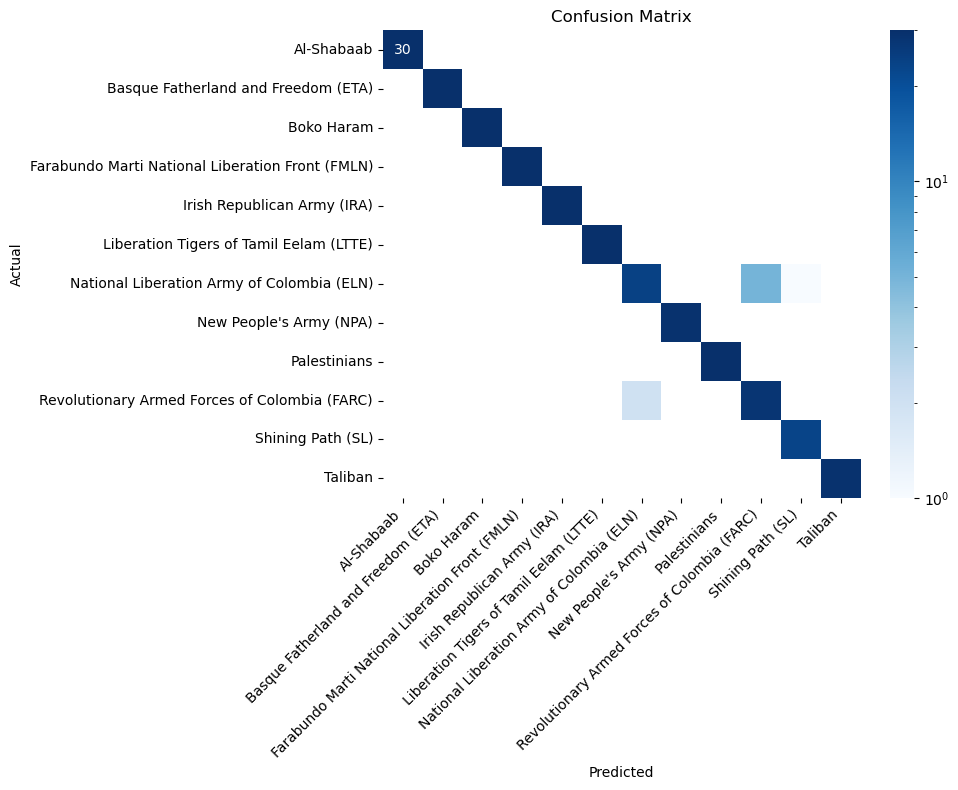

In [10]:
from matplotlib.colors import LogNorm


all_classes = ['Al-Shabaab', 'Basque Fatherland and Freedom (ETA)', 'Boko Haram',
               'Farabundo Marti National Liberation Front (FMLN)',
               'Irish Republican Army (IRA)',
               'Liberation Tigers of Tamil Eelam (LTTE)',
               'National Liberation Army of Colombia (ELN)',
               "New People's Army (NPA)", 'Palestinians',
               'Revolutionary Armed Forces of Colombia (FARC)',
               'Shining Path (SL)', 'Taliban']

cm = confusion_matrix(Ytest, y_pred_rfc, labels=all_classes)

df_cm = pd.DataFrame(cm, index=all_classes, columns=all_classes)
print(df_cm)
# Optional: Add class names

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=all_classes, yticklabels=all_classes,
            norm=LogNorm())  # 👈 this makes smaller values visible
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
print("Ytest unique:", sorted(set(Ytest)))
print("y_pred_rfc unique:", sorted(set(y_pred_rfc)))
print("Labels used in cm:", all_classes)


Ytest unique: ['Abu Sayyaf Group (ASG)', 'African National Congress (South Africa)', 'Al-Qaida in Iraq', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Al-Shabaab', 'Basque Fatherland and Freedom (ETA)', 'Boko Haram', 'Communist Party of India - Maoist (CPI-Maoist)', 'Corsican National Liberation Front (FLNC)', "Donetsk People's Republic", 'Farabundo Marti National Liberation Front (FMLN)', 'Fulani extremists', 'Houthi extremists (Ansar Allah)', 'Irish Republican Army (IRA)', 'Islamic State of Iraq and the Levant (ISIL)', "Kurdistan Workers' Party (PKK)", 'Liberation Tigers of Tamil Eelam (LTTE)', 'Manuel Rodriguez Patriotic Front (FPMR)', 'Maoists', 'Muslim extremists', 'National Liberation Army of Colombia (ELN)', "New People's Army (NPA)", 'Nicaraguan Democratic Force (FDN)', 'Palestinians', 'Revolutionary Armed Forces of Colombia (FARC)', 'Shining Path (SL)', 'Sikh Extremists', 'Taliban', 'Tehrik-i-Taliban Pakistan (TTP)', 'Tupac Amaru Revolutionary Movement (MRTA)']
y_pred_rfc uniqu

In [12]:
Ytest.value_counts()

gname
Abu Sayyaf Group (ASG)                              30
African National Congress (South Africa)            30
Tehrik-i-Taliban Pakistan (TTP)                     30
Taliban                                             30
Sikh Extremists                                     30
Shining Path (SL)                                   30
Revolutionary Armed Forces of Colombia (FARC)       30
Palestinians                                        30
Nicaraguan Democratic Force (FDN)                   30
New People's Army (NPA)                             30
National Liberation Army of Colombia (ELN)          30
Muslim extremists                                   30
Maoists                                             30
Manuel Rodriguez Patriotic Front (FPMR)             30
Liberation Tigers of Tamil Eelam (LTTE)             30
Kurdistan Workers' Party (PKK)                      30
Islamic State of Iraq and the Levant (ISIL)         30
Irish Republican Army (IRA)                         30
Hout

In [13]:
print(classification_report(Ytest, y_pred_rfc))

                                                  precision    recall  f1-score   support

                          Abu Sayyaf Group (ASG)       0.97      1.00      0.98        30
        African National Congress (South Africa)       1.00      1.00      1.00        30
                                Al-Qaida in Iraq       0.97      1.00      0.98        30
        Al-Qaida in the Arabian Peninsula (AQAP)       0.83      1.00      0.91        30
                                      Al-Shabaab       0.97      1.00      0.98        30
             Basque Fatherland and Freedom (ETA)       1.00      1.00      1.00        30
                                      Boko Haram       1.00      1.00      1.00        30
  Communist Party of India - Maoist (CPI-Maoist)       0.86      1.00      0.92        30
       Corsican National Liberation Front (FLNC)       0.97      1.00      0.98        30
                       Donetsk People's Republic       1.00      1.00      1.00        30
Farabundo

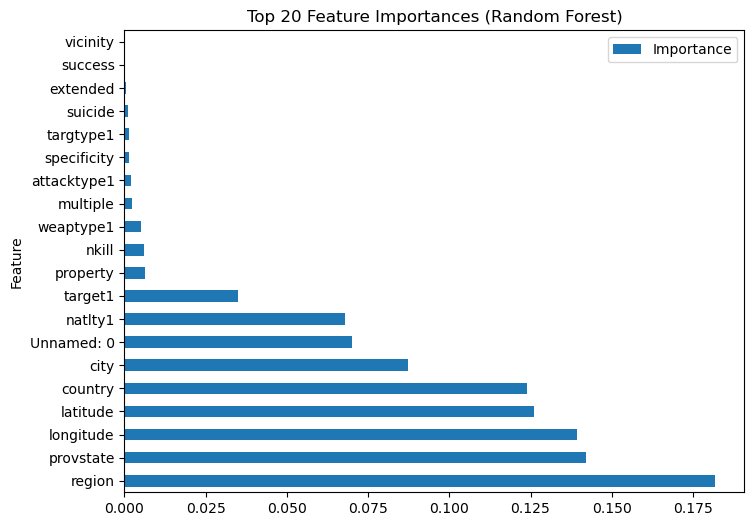

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importances
importances = model.feature_importances_
feature_names = Xtrain.columns

# Create a dataframe
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top features
feat_importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()
